### 1. **Asteroid Data (from NASA)**

We need information about the asteroid in question, such as:

* **Entry velocity** (typically between 11-72 km/s)
* **Size** (diameter)
* **Density** (typically between 2,000 and 3,000 kg/m³ for rocky asteroids)
* **Orbital inclination**
* **Distance from Earth** (to estimate the probability of collision)

This information is obtained directly from databases such as **NASA Asteroid Watch** or **Minor Planet Center**. They provide real-time data on near-Earth asteroids.

In [ ]:
%pip install astroquery

In [ ]:
from astroquery.cadc import Cadc
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

## Asteroid DATA - NASA NEO

In [25]:
import requests
import pandas as pd
import time
import datetime


today = datetime.date.today().strftime("%Y-%m-%d")

API_KEY = "0SS0PYXqmPsZl3TNmnPeuZamAMRuWDlei826hy0T"
start_date = "2025-09-29"
end_date = "2025-10-04"

# Endpoint feed
url = f"https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&end_date={end_date}&api_key={API_KEY}"

response = requests.get(url)
data = response.json()
display(data)

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2025-10-04&end_date=2025-10-09&detailed=false&api_key=0SS0PYXqmPsZl3TNmnPeuZamAMRuWDlei826hy0T',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2025-09-24&end_date=2025-09-29&detailed=false&api_key=0SS0PYXqmPsZl3TNmnPeuZamAMRuWDlei826hy0T',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2025-09-29&end_date=2025-10-04&detailed=false&api_key=0SS0PYXqmPsZl3TNmnPeuZamAMRuWDlei826hy0T'},
 'element_count': 118,
 'near_earth_objects': {'2025-10-03': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/3427459?api_key=0SS0PYXqmPsZl3TNmnPeuZamAMRuWDlei826hy0T'},
    'id': '3427459',
    'neo_reference_id': '3427459',
    'name': '(2008 SS)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=3427459',
    'absolute_magnitude_h': 22.18,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0973991073,
      'estimated_diameter_max': 0.217791025},
     'mete

In [26]:
import requests
import pandas as pd
import time
import datetime


response = requests.get(url)
data = response.json()

asteroids = []


for date, asteroid_list in data.get("near_earth_objects", {}).items():
    for asteroid in asteroid_list:
        asteroid_id = asteroid.get("id")

        #
        diameter_data = asteroid.get("estimated_diameter", {}).get("kilometers", {})
        est_diam_min = diameter_data.get("estimated_diameter_min")
        est_diam_max = diameter_data.get("estimated_diameter_max")

        #
        close_data = asteroid.get("close_approach_data", [])
        if close_data:
            close = close_data[0]
            close_date = close.get("close_approach_date")
            miss_distance = close.get("miss_distance", {}).get("kilometers")
            rel_velocity = close.get("relative_velocity", {}).get("kilometers_per_hour")
        else:
            close_date, miss_distance, rel_velocity = None, None, None

        # ---
        detail_url = f"https://api.nasa.gov/neo/rest/v1/neo/{asteroid_id}?api_key={API_KEY}"
        detail_resp = requests.get(detail_url).json()
        orbital_data = detail_resp.get("orbital_data", {})

        #
        asteroides_pd = {
            "id": asteroid_id,
            "name": asteroid.get("name"),
            "magnitude": asteroid.get("absolute_magnitude_h"),
            "hazardous": asteroid.get("is_potentially_hazardous_asteroid"),
            "diameter_min_km": est_diam_min,
            "diameter_max_km": est_diam_max,
            "close_date": close_date,
            "miss_distance_km": miss_distance,
            "velocity_kmh": rel_velocity,
            #
            "semi_major_axis": orbital_data.get("semi_major_axis"),
            "eccentricity": orbital_data.get("eccentricity"),
            "inclination": orbital_data.get("inclination"),
            "orbit_class": orbital_data.get("orbit_class", {}).get("orbit_class_description")

        }
        asteroids.append(asteroides_pd)

        time.sleep(0.2)

# final DataFrame
df = pd.DataFrame(asteroids)


display(df)

df.describe()

df['name'].unique()


,id,name,magnitude,hazardous,diameter_min_km,diameter_max_km,close_date,miss_distance_km,velocity_kmh,semi_major_axis,eccentricity,inclination,orbit_class
0,3427459,(2008 SS),22.180,False,0.097399,0.217791,2025-10-03,17860588.568532283,52300.2946120308,.9285116827289324,.479246673866332,21.13952185099964,Near-Earth asteroid orbits similar to that of ...
1,3716631,(2015 HN9),22.600,False,0.080270,0.179490,2025-10-03,12307670.348249437,27750.3476679028,1.251122639039683,.1580634538893045,14.48047374032017,Near-Earth asteroid orbits similar to that of ...
2,3720000,(2015 KT120),25.100,False,0.025384,0.056760,2025-10-03,39827549.38855575,41649.1343134956,.991335991066003,.213326428209476,14.83677304190468,Near-Earth asteroid orbits similar to that of ...
3,54201807,(2021 SY3),27.000,False,0.010582,0.023661,2025-10-03,7782741.82159392,21345.843187419,.8602270554123408,.2585717055090709,5.000748672060893,Near-Earth asteroid orbits similar to that of ...
4,54212590,(2021 UJ1),26.330,False,0.014406,0.032214,2025-10-03,66740907.725807328,79654.1300445942,1.196713814225069,.3212370340178375,6.337123827856383,Near-Earth asteroid orbits which cross the Ear...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,54549126,(2025 SM27),26.063,False,0.016291,0.036428,2025-09-30,4611839.668159854,28259.8959936378,1.317769875363477,.2791883152837104,10.10865664508002,Near-Earth asteroid orbits which cross the Ear...
114,54549125,(2025 SN27),26.702,False,0.012138,0.027142,2025-09-30,11095183.680961501,28511.384354515,2.216923299433198,.5168615578599476,9.38338848927747,Near-Earth asteroid orbits similar to that of ...
115,54549693,(2025 TE),28.443,False,0.005444,0.012174,2025-09-30,279945.246731808,53535.1781606616,1.454380366495705,.5022503135282133,3.71199421380298,Near-Earth asteroid orbits which cross the Ear...
116,54550571,(2025 TK1),24.784,False,0.029360,0.065651,2025-09-30,6032457.408922051,35102.8943842416,1.347771835987474,.2889593459207103,14.40804059388301,Near-Earth asteroid orbits which cross the Ear...


array(['(2008 SS)', '(2015 HN9)', '(2015 KT120)', '(2021 SY3)',
       '(2021 UJ1)', '(2022 FL1)', '(2022 QG41)', '(2022 SK21)',
       '(2022 VV)', '(2023 RV12)', '(2023 SV1)', '(2023 XJ16)',
       '(2024 TW)', '(2025 QK10)', '(2025 RH2)', '(2025 SV2)',
       '(2025 SV6)', '(2025 SE29)', '(2025 TC)', '(2025 TS)',
       '(2017 SJ20)', '(2017 TG1)', '(2019 TA1)', '(2019 TA7)',
       '(2020 GE1)', '(2021 EN2)', '(2021 PS16)', '(2021 UG1)',
       '(2022 UL13)', '(2023 RG22)', '(2023 TV9)', '(2023 XZ2)',
       '(2024 TZ)', '(2025 SH)', '(2025 SY)', '(2025 SB2)', '(2025 SS2)',
       '(2025 SV21)', '(2025 SN23)', '(2025 TG)', '(2025 TP1)',
       '(2008 TD)', '(2014 GQ17)', '(2015 SZ16)', '(2018 ES3)',
       '(2019 TS1)', '(2019 TY6)', '(2020 CR2)', '(2021 LA1)',
       '(2021 RF4)', '(2021 TD1)', '(2021 SZ4)', '(2021 VO)',
       '(2022 FF3)', '(2023 FL4)', '(2023 TT)', '(2023 TM3)',
       '(2025 SS3)', '(2025 SG22)', '(2025 SZ27)', '152664 (1998 FW4)',
       '418198 (2008 CN70)',

In [27]:
df.describe()

,magnitude,diameter_min_km,diameter_max_km
count,118.000000,118.000000,118.000000
mean,25.173780,0.044688,0.099926
std,2.295412,0.065483,0.146425
min,18.940000,0.001214,0.002714
25%,24.082500,0.010894,0.024361
50%,25.110000,0.025267,0.056499
75%,26.936750,0.040558,0.090690
max,31.702000,0.433067,0.968367


In [29]:
df.columns

Index(['id', 'name', 'magnitude', 'hazardous', 'diameter_min_km',
       'diameter_max_km', 'close_date', 'miss_distance_km', 'velocity_kmh',
       'semi_major_axis', 'eccentricity', 'inclination', 'orbit_class'],
      dtype='object')

In [28]:
df.groupby('hazardous').size()

,0
hazardous,
False,114
True,4


In [42]:
df_order = df[df['hazardous'] == True].sort_values(by='velocity_kmh', ascending=True)
display(df_order)

,id,name,magnitude,hazardous,diameter_min_km,diameter_max_km,close_date,miss_distance_km,velocity_kmh,semi_major_axis,eccentricity,inclination,orbit_class
80,3002856,(1991 GO),20.10,True,0.253837,0.567597,2025-10-01,70011871.989979987,116264.2472481438,1.925880669334396,.6542279571175877,9.554553586688776,Near-Earth asteroid orbits which cross the Ear...
51,54203006,(2021 SZ4),20.47,True,0.214070,0.478674,2025-10-04,71892716.088680768,160284.9273779689,1.542805452049318,.807369597651044,26.40210694019939,Near-Earth asteroid orbits which cross the Ear...
60,2152664,152664 (1998 FW4),19.68,True,0.308003,0.688716,2025-09-29,3852719.354004421,66983.1474694021,2.520166363944322,.7139855063885557,3.413357573769166,Near-Earth asteroid orbits which cross the Ear...
81,3346460,(2006 SS134),21.48,True,0.134448,0.300635,2025-10-01,12154759.453900843,68275.0959532751,1.171640492234779,.4421241706563107,19.53384221663039,Near-Earth asteroid orbits which cross the Ear...


In [53]:
## shoozing asteroid
asteroid = df_order.iloc[0]['id']

lis_asteroid = []
lis_asteroid.append(asteroid)

print(lis_asteroid)

['3002856']


In [57]:
df_filtrado = df_order[df_order['id']==asteroid]
display(df_filtrado)

,id,name,magnitude,hazardous,diameter_min_km,diameter_max_km,close_date,miss_distance_km,velocity_kmh,semi_major_axis,eccentricity,inclination,orbit_class
80,3002856,(1991 GO),20.1,True,0.253837,0.567597,2025-10-01,70011871.989979987,116264.2472481438,1.925880669334396,.6542279571175877,9.554553586688776,Near-Earth asteroid orbits which cross the Ear...


#Identifing Asteroid location - NEOSSAT

*******************************************************************************
JPL/HORIZONS                      (1991 GO)                2025-Oct-04 06:42:48
Rec #:50000019 (+COV) Soln.date: 2023-Jun-10_06:23:19     # obs: 89 (1991-2023)

IAU76/J2000 helio. ecliptic osc. elements (au, days, deg., period=Julian yrs):

  EPOCH=  2454037.5 ! 2006-Oct-29.00 (TDB)         Residual RMS= .6653
   EC= .6533478961428656   QR= .6678055416980783   TP= 2454158.8941431181
   OM= 24.72504430886981   W=  88.87566935170257   IN= 9.558248713006449
   A= 1.926443065735152    MA= 315.2526273966673   ADIST= 3.185080589772225
   PER= 2.67388            N= .368612286           ANGMOM= .018075427
   DAN= 1.09014            DDN= 1.11845            L= 113.5848893
   B= 9.5563912            MOID= .0238997          TP= 2007-Feb-27.3941431181

Asteroid physical parameters (km, seconds, rotational period in hours):
   GM= n.a.                RAD= n.a.               ROTPER= n.a.
   H= 20.1                 G= .150                 B-V= n.a.
                           ALBEDO= n.a.            STYP= n.a.

ASTEROID comments:
1: soln ref.= JPL#27, PHA  OCC=0
2: source=ORB
*******************************************************************************


*******************************************************************************
Ephemeris / WWW_USER Sat Oct  4 06:42:49 2025 Pasadena, USA      / Horizons    
*******************************************************************************
Target body name: (1991 GO)                       {source: JPL#27}
Center body name: Earth (399)                     {source: DE441}
Center-site name: GEOCENTRIC
*******************************************************************************
Start time      : A.D. 2025-Oct-04 00:00:00.0000 UT      
Stop  time      : A.D. 2025-Nov-03 00:00:00.0000 UT      
Step-size       : 1440 minutes
*******************************************************************************
Target pole/equ : undefined
Target radii    : undefined                                                    
Center geodetic : 0.0, 0.0, -6378.137             {E-lon(deg),Lat(deg),Alt(km)}
Center cylindric: 0.0, 0.0, 0.0                   {E-lon(deg),Dxy(km),Dz(km)}
Center pole/equ : ITRF93                          {East-longitude positive}
Center radii    : 6378.137, 6378.137, 6356.752 km {Equator_a, b, pole_c}       
Target primary  : Sun
Vis. interferer : MOON (R_eq= 1737.400) km        {source: DE441}
Rel. light bend : Sun                             {source: DE441}
Rel. lght bnd GM: 1.3271E+11 km^3/s^2                                          
Small-body perts: Yes                             {source: SB441-N16}
Atmos refraction: NO (AIRLESS)
RA format       : HMS
Time format     : CAL
Calendar mode   : Mixed Julian/Gregorian
EOP file        : eop.251003.p251230                                           
EOP coverage    : DATA-BASED 1962-JAN-20 TO 2025-OCT-03. PREDICTS-> 2025-DEC-29
Units conversion: 1 au= 149597870.700 km, c= 299792.458 km/s, 1 day= 86400.0 s
Table cut-offs 1: Elevation (-90.0deg=NO ),Airmass (>38.000=NO), Daylight (NO )
Table cut-offs 2: Solar elongation (  0.0,180.0=NO ),Local Hour Angle( 0.0=NO )
Table cut-offs 3: RA/DEC angular rate (     0.0=NO )                           
*******************************************************************************
Initial IAU76/J2000 heliocentric ecliptic osculating elements (au, days, deg.):
  EPOCH=  2454037.5 ! 2006-Oct-29.00 (TDB)         Residual RMS= .6653         
   EC= .6533478961428656   QR= .6678055416980783   TP= 2454158.8941431181      
   OM= 24.72504430886981   W=  88.87566935170257   IN= 9.558248713006449       
  Equivalent ICRF heliocentric cartesian coordinates (au, au/d):
   X= 1.710782687959050E+00  Y=-2.183572923808371E-01  Z=-2.778186872316112E-01
  VX=-6.689902294135060E-03 VY= 9.779144324168989E-03 VZ= 6.692879757273742E-03
Asteroid physical parameters (km, seconds, rotational period in hours):        
   GM= n.a.                RAD= n.a.               ROTPER= n.a.                
   H= 20.1                 G= .150                 B-V= n.a.                   
                           ALBEDO= n.a.            STYP= n.a.                  
******************************************************************************************************************************************************************************
 Date__(UT)__HR:MN     R.A._____(ICRF)_____DEC    APmag   S-brt             delta      deldot     S-O-T /r     S-T-O  Sky_motion  Sky_mot_PA  RelVel-ANG  Lun_Sky_Brt  sky_SNR
******************************************************************************************************************************************************************************
$$SOE
 2025-Oct-04 00:00     08 19 09.80 +24 33 07.0   21.233    n.a.  0.46986380750475   2.6213266   69.3595 /L   82.8636   5.6937944   95.532806   4.6322214         n.a.     n.a.
 2025-Oct-05 00:00     08 29 05.70 +24 19 01.5   21.257    n.a.  0.47167604806983   3.6535619   68.0991 /L   83.9332   5.6678165   96.586238   6.4483908         n.a.     n.a.
 2025-Oct-06 00:00     08 38 55.89 +24 02 32.4   21.283    n.a.  0.47408166848254   4.6758587   66.8510 /L   84.9636   5.6312103   97.625257   8.2424094         n.a.     n.a.
 2025-Oct-07 00:00     08 48 39.00 +23 43 45.9   21.311    n.a.  0.47707403653903   5.6851699   65.6194 /L   85.9500   5.5846189   98.646323   10.008951         n.a.     n.a.
 2025-Oct-08 00:00     08 58 13.79 +23 22 49.5   21.339    n.a.  0.48064482716022   6.6786890   64.4079 /L   86.8880   5.5288004   99.646286   11.743011         n.a.     n.a.
 2025-Oct-09 00:00     09 07 39.15 +22 59 51.4   21.369    n.a.  0.48478417781266   7.6539048   63.2199 /L   87.7735   5.4646051   100.62242   13.440000         n.a.     n.a.
 2025-Oct-10 00:00     09 16 54.12 +22 35 00.5   21.399    n.a.  0.48948087076772   8.6086387   62.0586 /L   88.6028   5.3929529   101.57246   15.095797         n.a.     n.a.
 2025-Oct-11 00:00     09 25 57.92 +22 08 26.1   21.429    n.a.  0.49472253039895   9.5410588   60.9267 /L   89.3723   5.3148117   102.49462   16.706768         n.a.     n.a.
 2025-Oct-12 00:00     09 34 49.89 +21 40 17.6   21.458    n.a.  0.50049582202086  10.4496717   59.8265 /L   90.0792   5.2311750   103.38754   18.269741         n.a.     n.a.
 2025-Oct-13 00:00     09 43 29.56 +21 10 44.7   21.488    n.a.  0.50678664119016  11.3332994   58.7598 /L   90.7209   5.1430402   104.25035   19.781966         n.a.     n.a.
 2025-Oct-14 00:00     09 51 56.57 +20 39 56.6   21.516    n.a.  0.51358028708242  12.1910485   57.7283 /L   91.2951   5.0513881   105.08255   21.241069         n.a.     n.a.
 2025-Oct-15 00:00     10 00 10.71 +20 08 02.4   21.544    n.a.  0.52086161774827  13.0222787   56.7330 /L   91.8001   4.9571634   105.88400   22.645023         n.a.     n.a.
 2025-Oct-16 00:00     10 08 11.90 +19 35 10.7   21.570    n.a.  0.52861518729185  13.8265719   55.7748 /L   92.2345   4.8612597   106.65486   23.992126         n.a.     n.a.
 2025-Oct-17 00:00     10 16 00.17 +19 01 29.6   21.595    n.a.  0.53682536553553  14.6037024   54.8541 /L   92.5973   4.7645073   107.39555   25.280976         n.a.     n.a.
 2025-Oct-18 00:00     10 23 35.64 +18 27 06.4   21.618    n.a.  0.54547644047571  15.3536070   53.9711 /L   92.8878   4.6676649   108.10666   26.510461         n.a.     n.a.
 2025-Oct-19 00:00     10 30 58.51 +17 52 08.1   21.640    n.a.  0.55455270353666  16.0763552   53.1255 /L   93.1056   4.5714148   108.78892   27.679734         n.a.     n.a.
 2025-Oct-20 00:00     10 38 09.05 +17 16 40.8   21.659    n.a.  0.56403851761745  16.7721197   52.3171 /L   93.2508   4.4763604   109.44319   28.788202         n.a.     n.a.
 2025-Oct-21 00:00     10 45 07.61 +16 40 50.1   21.677    n.a.  0.57391836821002  17.4411473   51.5452 /L   93.3236   4.3830264   110.07034   29.835497         n.a.     n.a.
 2025-Oct-22 00:00     10 51 54.56 +16 04 40.9   21.692    n.a.  0.58417689833812  18.0837321   50.8090 /L   93.3245   4.2918606   110.67129   30.821466         n.a.     n.a.
 2025-Oct-23 00:00     10 58 30.31 +15 28 17.4   21.706    n.a.  0.59479892858515  18.7001907   50.1076 /L   93.2542   4.2032368   111.24691   31.746146         n.a.     n.a.
 2025-Oct-24 00:00     11 04 55.32 +14 51 43.5   21.717    n.a.  0.60576946392229  19.2908414   49.4400 /L   93.1137   4.1174592   111.79805   32.609755         n.a.     n.a.
 2025-Oct-25 00:00     11 11 10.05 +14 15 02.3   21.726    n.a.  0.61707368933007  19.8559865   48.8050 /L   92.9041   4.0347668   112.32551   33.412678         n.a.     n.a.
 2025-Oct-26 00:00     11 17 14.96 +13 38 16.6   21.733    n.a.  0.62869695628754  20.3958979   48.2013 /L   92.6268   3.9553388   112.82998   34.155452         n.a.     n.a.
 2025-Oct-27 00:00     11 23 10.55 +13 01 28.8   21.739    n.a.  0.64062476209525  20.9108068   47.6276 /L   92.2834   3.8792998   113.31210   34.838764         n.a.     n.a.
 2025-Oct-28 00:00     11 28 57.29 +12 24 40.6   21.742    n.a.  0.65284272373370  21.4008951   47.0828 /L   91.8755   3.8067256   113.77239   35.463431         n.a.     n.a.
 2025-Oct-29 00:00     11 34 35.65 +11 47 53.9   21.744    n.a.  0.66533654758347  21.8662893   46.5654 /L   91.4050   3.7376487   114.21129   36.030396         n.a.     n.a.
 2025-Oct-30 00:00     11 40 06.12 +11 11 09.9   21.744    n.a.  0.67809199588593  22.3070552   46.0740 /L   90.8740   3.6720631   114.62917   36.540713         n.a.     n.a.
 2025-Oct-31 00:00     11 45 29.13 +10 34 29.6   21.743    n.a.  0.69109485036600  22.7231934   45.6075 /L   90.2846   3.6099299   115.02629   36.995531         n.a.     n.a.
 2025-Nov-01 00:00     11 50 45.15 +09 57 54.1   21.740    n.a.  0.70433087310927  23.1146342   45.1645 /L   89.6391   3.5511806   115.40285   37.396087         n.a.     n.a.
 2025-Nov-02 00:00     11 55 54.60 +09 21 24.0   21.736    n.a.  0.71778576487288  23.4812340   44.7437 /L   88.9400   3.4957213   115.75896   37.743691         n.a.     n.a.
 2025-Nov-03 00:00     12 00 57.90 +08 45 00.0   21.732    n.a.  0.73144512195639  23.8227749   44.3441 /L   88.1899   3.4434348   116.09468   38.039727         n.a.     n.a.
$$EOE
******************************************************************************************************************************************************************************
Column meaning:

TIME

  Times PRIOR to 1962 are UT1, a mean-solar time closely related to the
prior but now-deprecated GMT. Times AFTER 1962 are in UTC, the current
civil or "wall-clock" time-scale. UTC is kept within 0.9 seconds of UT1
using integer leap-seconds for 1972 and later years.

  Conversion from the internal Barycentric Dynamical Time (TDB) of solar
system dynamics to the non-uniform civil UT time-scale requested for output
has not been determined for UTC times after the next July or January 1st.
Therefore, the last known leap-second is used as a constant over future
intervals.

  Time tags refer to the UT time-scale conversion from TDB on Earth
regardless of observer location within the solar system, although clock
rates may differ due to the local gravity field and no analog to "UT"
may be defined for that location.

  Any 'b' symbol in the 1st-column denotes a B.C. date. First-column blank
(" ") denotes an A.D. date.

CALENDAR SYSTEM

  Mixed calendar mode was active such that calendar dates after AD 1582-Oct-15
(if any) are in the modern Gregorian system. Dates prior to 1582-Oct-5 (if any)
are in the Julian calendar system, which is automatically extended for dates
prior to its adoption on 45-Jan-1 BC.  The Julian calendar is useful for
matching historical dates. The Gregorian calendar more accurately corresponds
to the Earth's orbital motion and seasons. A "Gregorian-only" calendar mode is
available if such physical events are the primary interest.

  NOTE: "n.a." in output means quantity "not available" at the print-time.

 'R.A._____(ICRF)_____DEC' =
  Astrometric right ascension and declination of the target center with
respect to the observing site (coordinate origin) in the reference frame of
the planetary ephemeris (ICRF). Compensated for down-leg light-time delay
aberration.

  Units: RA  in hours-minutes-seconds of time,    HH MM SS.ff{ffff}
         DEC in degrees-minutes-seconds of arc,  sDD MN SC.f{ffff}

 'APmag   S-brt' =
   The asteroids' approximate apparent airless visual magnitude and surface
brightness using the standard IAU H-G system magnitude model:

   APmag = H + 5*log10(delta) + 5*log10(r) - 2.5*log10((1-G)*phi_1 + G*phi_2)

   For solar phase angles >90 deg, the error could exceed 1 magnitude. For
phase angles >120 degrees, output values are rounded to the nearest integer to
indicate error could be large and unknown. For Earth-based observers, the
estimated dimming due to atmospheric absorption (extinction) is available as
a separate, requestable quantity.

   Surface brightness is the average airless visual magnitude of a
square-arcsecond of the illuminated portion of the apparent disk. It is
computed only if the target radius is known.

   Units: MAGNITUDES & MAGNITUDES PER SQUARE ARCSECOND

 'delta      deldot' =
   Apparent range ("delta", light-time aberrated) and range-rate ("delta-dot")
of the target center relative to the observer. A positive "deldot" means the
target center is moving away from the observer, negative indicates movement
toward the observer.  Units: AU and KM/S

 'S-O-T /r' =
   Sun-Observer-Target apparent SOLAR ELONGATION ANGLE seen from the observers'
location at print-time.

   The '/r' column provides a code indicating the targets' apparent position
relative to the Sun in the observers' sky, as described below:

   Case A: For an observing location on the surface of a rotating body, that
body rotational sense is considered:

    /T indicates target TRAILS Sun   (evening sky: rises and sets AFTER Sun)
    /L indicates target LEADS Sun    (morning sky: rises and sets BEFORE Sun)

   Case B: For an observing point that does not have a rotational model (such
as a spacecraft), the "leading" and "trailing" condition is defined by the
observers' heliocentric ORBITAL motion:

    * If continuing in the observers' current direction of heliocentric
       motion would encounter the targets' apparent longitude first, followed
       by the Sun's, the target LEADS the Sun as seen by the observer.

    * If the Sun's apparent longitude would be encountered first, followed
       by the targets', the target TRAILS the Sun.

   Two other codes can be output:
    /* indicates observer is Sun-centered    (undefined)
    /? Target is aligned with Sun center     (no lead or trail)

   The S-O-T solar elongation angle is numerically the minimum separation
angle of the Sun and target in the sky in any direction. It does NOT indicate
the amount of separation in the leading or trailing directions, which would
be defined along the equator of a spherical coordinate system.

   Units: DEGREES

 'S-T-O' =
   The Sun-Target-Observer angle; the interior vertex angle at target center
formed by a vector from the target to the apparent center of the Sun (at
reflection time on the target) and the apparent vector from target to the
observer at print-time. Slightly different from true PHASE ANGLE (requestable
separately) at the few arcsecond level in that it includes stellar aberration
on the down-leg from target to observer.  Units: DEGREES

 'Sky_motion  Sky_mot_PA  RelVel-ANG' =
  Total apparent angular rate of the target in the plane-of-sky. "Sky_mot_PA"
is the position angle of the target's direction of motion in the plane-of-sky,
measured counter-clockwise from the apparent of-date north pole direction.
"RelVel-ANG" is the flight path angle of the target's relative motion with
respect to the observer's line-of-sight, in the range [-90,+90], where positive
values indicate motion away from the observer, negative values are toward the
observer:

  -90 = target is moving directly toward the observer
    0 = target is moving at right angles to the observer's line-of-sight
  +90 = target is moving directly away from the observer

UNITS:  ARCSECONDS/MINUTE, DEGREES, DEGREES

 'Lun_Sky_Brt  sky_SNR' =
  Sky brightness due to moonlight scattered by Earth's atmosphere at the
target's position in the sky. "sky_SNR" is the visual signal-to-noise ratio
(SNR) of the target's surface brightness relative to background sky. Output
only for topocentric Earth observers when both the Moon and target are above
the local horizon and the Sun is in astronomical twilight (or further) below
the horizon, and the target is not the Moon or Sun. If all conditions are
not met, "n.a." is output. Galactic brightness, local sky light-pollution
and weather are NOT considered. Lunar opposition surge is considered. The
value returned is accurate under ideal conditions at the approximately 8-23%
level, so is a useful but not definitive value.

  If the target-body radius is also known, "sky_SNR" is output. This is the
approximate visual signal-to-noise ratio of the target's brightness divided
by lunar sky brightness. When sky_SNR < 1, the target is dimmer than the
ideal moonlight-scattering background sky, so unlikely to be detectable at
visual wavelengths. In practice, visibility requires sky_SNR > 1 and a
detector sensitive enough to reach the target's magnitude, even if it isn't
washed out by moonlight. When relating magnitudes and brightness values,
keep in mind their logarithmic relationship m2-m1 = -2.5*log_10(b2/b1).

  UNITS: VISUAL MAGNITUDES / ARCSECOND^2, and unitless ratio

Computations by ...

    Solar System Dynamics Group, Horizons On-Line Ephemeris System
    4800 Oak Grove Drive, Jet Propulsion Laboratory
    Pasadena, CA  91109   USA

    General site: https://ssd.jpl.nasa.gov/
    Mailing list: https://ssd.jpl.nasa.gov/email_list.html
    System news : https://ssd.jpl.nasa.gov/horizons/news.html
    User Guide  : https://ssd.jpl.nasa.gov/horizons/manual.html
    Connect     : browser        https://ssd.jpl.nasa.gov/horizons/app.html#/x
                  API            https://ssd-api.jpl.nasa.gov/doc/horizons.html
                  command-line   telnet ssd.jpl.nasa.gov 6775
                  e-mail/batch   https://ssd.jpl.nasa.gov/ftp/ssd/horizons_batch.txt
                  scripts        https://ssd.jpl.nasa.gov/ftp/ssd/SCRIPTS
    Author      : Jon.D.Giorgini@jpl.nasa.gov

******************************************************************************************************************************************************************************


In [ ]:
from astroquery.cadc import Cadc
from astropy.coordinates import SkyCoord
import astropy.units as u


In [76]:
from astroquery.cadc import Cadc
from astropy.coordinates import SkyCoord
import astropy.units as u

# Inicializa o cliente CADC
cadc = Cadc()

# Exibe as coleções disponíveis
for collection, details in sorted(cadc.get_collections().items()):
    print(f'{collection} : {details}')

# Define as coordenadas do asteroide escolhido
coords = SkyCoord(203.869, 10.209, unit='deg')  # RA, DEC
radius = 0.5 * u.deg

# Consulta a região na coleção NEOSSAT
results = cadc.query_region(coordinates=coords, radius=radius, collection='NEOSSAT')
print(results)

APASS : {'Description': 'The APASS collection at the CADC', 'Bands': [np.str_(''), np.str_('Optical'), np.str_('Infrared|Optical')]}
BLAST : {'Description': 'The BLAST collection at the CADC', 'Bands': [np.str_(''), np.str_('Millimeter')]}
BRITE-Constellation : {'Description': 'The BRITE-Constellation collection at the CADC', 'Bands': [np.str_('Optical')]}
CFHT : {'Description': 'The CFHT collection at the CADC', 'Bands': [np.str_('Optical'), np.str_('Infrared|Optical|UV'), np.str_('Infrared'), np.str_('Optical|UV|EUV|X-ray|Gamma-ray'), np.str_(''), np.str_('Infrared|Optical')]}
CFHTMEGAPIPE : {'Description': 'The CFHTMEGAPIPE collection at the CADC', 'Bands': [np.str_('Optical'), np.str_('Infrared|Optical'), np.str_('')]}
CFHTTERAPIX : {'Description': 'The CFHTTERAPIX collection at the CADC', 'Bands': [np.str_('Infrared|Optical'), np.str_('Optical'), np.str_('Infrared')]}
CFHTWIRWOLF : {'Description': 'The CFHTWIRWOLF collection at the CADC', 'Bands': [np.str_('Infrared')]}
CGPS : {'D

In [82]:
display(results['time_exposure'])

<MaskedColumn name='time_exposure' dtype='float64' unit='s' description='median exposure time per pixel' length=2>
 5.0014
30.5075

In [85]:
#Filter the query results to select data with a specifc 'time_exposure'.
# In this example 'time exposure' greater than 50 is selected

filtered_results = results[results['time_exposure'] <= 50.0]

#Access data points from the filtered results
print(filtered_results['time_exposure'][0])
print(filtered_results['position_dimension_naxis2'][0])
print(filtered_results['position_dimension_naxis1'][0])
print(filtered_results['instrument_keywords'][0])
print(filtered_results['metaRelease'][0])

5.0014
256
728
21-DESAT
2019-03-12T12:53:00.000


In [86]:
#Get a list of image URLs based on the filtered results
image_list = cadc.get_image_list(filtered_results, coords, radius)

#Print the number of images int he image_list
print(len(image_list))

#print the last URL in the image_list
print(image_list[-1])


filename = image_list[1]
print(filename)

/usr/local/lib/python3.12/dist-packages/astroquery/cadc/core.py:806: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(response2.text, features="html5lib")


2
https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/caom2ops/sync?ID=cadc%3ANEOSSAT%2FNEOS_SCI_2019349232816.fits&POS=CIRCLE+203.8690052665458+10.208999925214004+0.5
https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/caom2ops/sync?ID=cadc%3ANEOSSAT%2FNEOS_SCI_2019349232816.fits&POS=CIRCLE+203.8690052665458+10.208999925214004+0.5


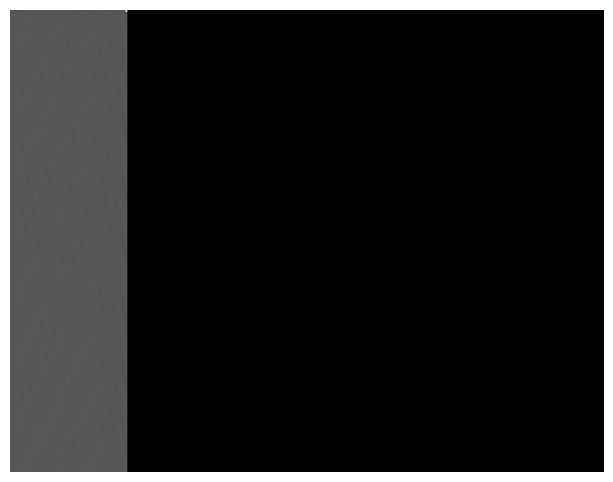

In [87]:
#Read the FITS image data from the file
image_data = fits.getdata(filename, ext =0)

#Show the image file
plt.style.use(astropy_mpl_style)
plt.figure()
plt.axis ('off')
plt.imshow(image_data, cmap='gray')
plt.show()

In [ ]:
import os
import requests
import re
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from astropy.io import fits
from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.cadc import Cadc
from scipy.ndimage import gaussian_filter, median_filter
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks
from skimage.morphology import (
    binary_closing,
    binary_opening,
    remove_small_objects,
    binary_dilation,
    disk,
)
from skimage.draw import line as draw_line
from pylsd.lsd import lsd
from IPython.display import Image

### 2. **Impact on the Argentine Region**

The analysis of the impact on Argentina involves the following factors:

#### A) **Geological Effects**

* **Earthquakes**: An asteroid impact can generate a large amount of energy that is converted into seismic waves, potentially triggering earthquakes. The type of soil in the affected region can also influence the intensity of the seismic shock.
* **Tsunamis**: If the impact occurs in the ocean or in a coastal area, a tsunami can be generated depending on the size and depth of the impact. Argentina has an extensive Atlantic coastline, with several cities, such as Buenos Aires, Mar del Plata, and others, that could be affected by a tsunami.

#### B) **Effect Estimates**

We need specific data to calculate the effect of an asteroid in terms of:

* **Energy Released**: The formula for calculating kinetic energy (E_k) is given by:

  [E_k = \frac{1}{2} m v^2] where:

  * (m) is the asteroid's mass (which can be calculated from its volume and density)
  * (v) is the asteroid's entry velocity.

* **Crater Size**: The crater size can be estimated based on the impact, using empirical formulas. For example, Holsapple's formula:
[
D_{crater} = 1.4 \left(\frac{m}{\rho}\right)^{1/3} v^{2/3}
]
where:

* (D_{crater}) is the crater diameter,
* (m) is the asteroid's mass,
* (\rho) is the asteroid's density,
* (v) is the impact velocity.

In [93]:
import math

In [94]:
def impact_energy(diameter_km, velocity_kmh, density=3000):
  # Convert diameter km → meters
  radius_m = (diameter_km * 1000) / 2

  # Mass in kg
  mass = (4/3) * math.pi * radius_m**3 * density

  # Velocity in m/s
  velocity_ms = velocity_kmh / 3.6

  # Kinetic energy in Joules
  energy_j = 0.5 * mass * velocity_ms**2

  # Convert to tons of TNT
  energy_tnt = energy_j / 4.184e9

  return energy_j, energy_tnt


## calculate crater scale
def crater_diameter(energy_j):
  D_m = 1.161 * (energy_j / 1e6)**(1/3.4)
  return D_m

### **3. Obtaining Regional Data (Argentina)**

We will use data from the USGS (United States Geological Survey) to determine the seismic conditions and tsunami risk in Argentina. The USGS provides information on:

Real-time seismic activity.
Seismic and tsunami risk maps for different areas of the world.

Final Table Structure

The final table can be structured as follows, considering a hypothetical impact scenario in Argentina:

| Parameter | Estimated Value |
| ----------------------------------- | ------------------------------------------------------ |
| Asteroid Velocity (km/s) | [Value calculated/obtained from NASA] |
| Asteroid Size (diameter) | [Value calculated/obtained from NASA] |
| Asteroid Density (kg/m³) | [Value obtained from NASA] |
| Impact Zone (Error Distance) | [Calculated based on the asteroid's orbit] |
| Asteroid Inclination (degrees) | [Value obtained from NASA] |
| Released Kinetic Energy (Joules) | [Calculated based on mass and velocity] |
| Crater Size (meters) | [Calculated using the Holsapple formula] |
| Location in Argentina | [Example: Buenos Aires, Mar del Plata] |
| Earthquake Potential | [Estimated based on released energy] |
| Tsunami Potential | [Estimated based on impact and proximity to the ocean] |

In [88]:
import requests
import pandas as pd

# Bounding box approximate Argentina (latitude and longitude)
params = {
"format": "geojson",
"starttime": "2025-09-01",
"endtime": "2025-10-02",
"minlatitude": -55,
"maxlatitude": -20,
"minlongitude": -75,
"maxlongitude": -53,
"minmagnitude": 3.5
}

url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
response = requests.get(url, params=params)
data = response.json()

# Transform into DataFrame
earthquakes = [
{
"time": feat["properties"]["time"],
"place": feat["properties"]["place"],
"mag": feat["properties"]["mag"],
"lon": feat["geometry"]["coordinates"][0],
"lat": feat["geometry"]["coordinates"][1],
"depth": feat["geometry"]["coordinates"][2]
}
for feat in data["features"]
]

df_quake = pd.DataFrame(earthquakes)
print(df_quake.head())

            time                                   place  mag      lon  \
0  1759264265956               73 km W of Ollagüe, Chile  4.2 -68.9589   
1  1759182119223           22 km NE of San Felipe, Chile  4.1 -70.5592   
2  1759167617660              51 km NNE of Calama, Chile  4.2 -68.7945   
3  1759111121766  14 km S of San Pedro de Atacama, Chile  4.4 -68.2207   
4  1759095067503            69 km WNW of La Ligua, Chile  4.2 -71.9585   

       lat    depth  
0 -21.3119  102.815  
1 -32.5992   21.856  
2 -22.0098  102.257  
3 -23.0390  158.822  
4 -32.3235   30.000  


In [89]:
display(df_quake)

,time,place,mag,lon,lat,depth
0,1759264265956,"73 km W of Ollagüe, Chile",4.2,-68.9589,-21.3119,102.815
1,1759182119223,"22 km NE of San Felipe, Chile",4.1,-70.5592,-32.5992,21.856
2,1759167617660,"51 km NNE of Calama, Chile",4.2,-68.7945,-22.0098,102.257
3,1759111121766,"14 km S of San Pedro de Atacama, Chile",4.4,-68.2207,-23.0390,158.822
4,1759095067503,"69 km WNW of La Ligua, Chile",4.2,-71.9585,-32.3235,30.000
5,1759037143120,"43 km W of Ollagüe, Chile",4.6,-68.6675,-21.1721,122.735
6,1759026927419,"71 km SSW of Vallenar, Chile",4.3,-71.0892,-29.1489,52.091
7,1758959252739,"53 km W of Ollagüe, Chile",4.4,-68.7700,-21.1828,112.361
8,1758828479798,"53 km W of Illapel, Chile",4.2,-71.7314,-31.6774,31.651
9,1758735359801,"73 km SSW of Atocha, Bolivia",4.1,-66.4828,-21.5553,226.641


In [ ]:
df_erathquake = pd.read_csv("Earthquake.csv")
display(df_erathquake)

df_elevation = pd.read_csv("elevation.csv")
display(df_elevation)

🪐 Fictional Asteroid Data
- Diameter: 250 meters
- Entry velocity: 22 km/s
- Density: 3,000 kg/m³
- Orbital inclination: 35°
- Impact zone: Mar del Plata, Argentina
- Trajectory error: ±15 km

📏 1. Asteroid Mass Calculation
Volume (sphere): V = 4/3 * π * r³ = 8.18 × 10⁶ m³
Mass: m = volume * density = 2.45 × 10¹⁰ kg

💥 2. Released Kinetic Energy
E_k = 0.5 * m * v² = 5.94 × 10¹⁸ J
Equivalent: ~1,420 megatons of TNT (~100,000 Hiroshima bombs)

🕳️ 3. Crater Size
Empirical formula:
D_crater ≈ 20 × (D_ast/1000)^0.78 × (v/20)^0.44 ≈ 7.3 km

🌊 4. Tsunami Potential
- Impact on the sea near the coast
- Wave height near the coast: 20–40 meters
- Wave speed: v = √(g * h) ≈ 712 km/h (depth ≈ 4,000 m)
- Cities affected: Mar del Plata, Miramar, Necochea, up to Buenos Aires

🌐 5. Earthquake Potential
- Energy released comparable to magnitude 8.5
- Seismic effects felt across much of Argentina and Uruguay

✅ FINAL TABLE — ASTEROID IMPACT IN MAR DEL PLATA

| Parameter | Value |
|------------------------------|--------------------------------|
| Asteroid Speed ​​| 22 km/s |
| Asteroid Size | 250 meters |
| Asteroid Density | 3,000 kg/m³ |
| Impact Zone | Mar del Plata, Argentina |
| Error Distance | ±15 km |
| Orbital Inclination | 35° |
| Released Kinetic Energy | 5.94 × 10¹⁸ J |
| TNT Equivalent | ~1,420 megatons |
| Crater Size | ~7.3 km |
| Earthquake Potential | Magnitude ~8.5 |
| Tsunami Potential | Waves up to 40 m |

📘 Estimates based on:
- Wave physics: v = √(g·h)
- Impact models (Ward & Asphaug, 2000; Gisler et al., 2011)
"""

In [92]:
# pip install requests pandas folium

import requests
import pandas as pd
import folium
from datetime import datetime

# ---------------------------
#1) Fetch USGS Earthquakes
# ---------------------------
params = {
    "format": "geojson",
    "starttime": "2025-09-01",
    "endtime": "2025-10-02",
    "minlatitude": -55,
    "maxlatitude": -20,
    "minlongitude": -75,
    "maxlongitude": -53,
    "minmagnitude": 3.5
}

usgs_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
response = requests.get(usgs_url, params=params)
data = response.json()

earthquakes = [
    {
        "time": datetime.utcfromtimestamp(feat["properties"]["time"] / 1000),
        "place": feat["properties"]["place"],
        "mag": feat["properties"]["mag"],
        "lon": feat["geometry"]["coordinates"][0],
        "lat": feat["geometry"]["coordinates"][1],
        "depth": feat["geometry"]["coordinates"][2]
    }
    for feat in data["features"]
]
df_terremotos = pd.DataFrame(earthquakes)

# ---------------------------
#2) Fetch Tsunami Alerts from NOAA
# ---------------------------

noaa_url = "https://www.tsunami.gov/events/xml/atom.xml"  #
noaa_geojson_url = "https://www.tsunami.gov/events/json/tsunami_events.json"  #

try:
    tsunami_data = requests.get(noaa_geojson_url).json()
    tsunami_events = tsunami_data.get("features", [])
except:
    tsunami_events = []

df_tsunami = pd.DataFrame(tsunami_events)


/tmp/ipython-input-4151511352.py:28: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  "time": datetime.utcfromtimestamp(feat["properties"]["time"] / 1000),


In [96]:
display(df_tsunami)

""


In [110]:
# Asteroid Impact Risk Notebook
# Energy calculation, earthquake and tsunami risk with visualization

# pip install pandas numpy matplotlib

import math
import pandas as pd
import matplotlib.pyplot as plt

# Selected
asteroid_data = df_filtrado.iloc[0]

# convert
asteroid_data['diameter_min_km'] = float(asteroid_data['diameter_min_km'])
asteroid_data['diameter_max_km'] = float(asteroid_data['diameter_max_km'])
asteroid_data['velocity_kmh'] = float(asteroid_data['velocity_kmh'])
asteroid_data['miss_distance_km'] = float(asteroid_data['miss_distance_km'])

results = []
for diam in [asteroid_data['diameter_min_km'], asteroid_data['diameter_max_km']]:
    energy_j, energy_mt, mass, vel_ms = compute_energy(diam, asteroid_data['velocity_kmh'])
    impact = impact_check(asteroid_data['miss_distance_km'])
    seismic_mag = estimate_seismic_magnitude(energy_j) if impact else None
    tsunami_height = estimate_tsunami_height(energy_mt) if impact else None
    crater_diam = crater_diameter(energy_j)

    # ry real img else placeholder
    try:
        import requests
        response = requests.head(f"https://neossat.ca/images/{asteroid_data['id']}.jpg", verify=False)
        neossat_image = f"https://neossat.ca/images/{asteroid_data['id']}.jpg" if response.status_code == 200 else "https://dummyimage.com/150x150/cccccc/000000.png&text=No+Image"
    except:
        neossat_image = "https://dummyimage.com/150x150/cccccc/000000.png&text=No+Image"

    results.append({
        'id': asteroid_data['id'],
        'name': asteroid_data['name'],
        'diam_km': diam,
        'mass_kg': mass,
        'vel_ms': vel_ms,
        'energy_j': energy_j,
        'energy_mt_tnt': energy_mt,
        'impact': impact,
        'seismic_magnitude': seismic_mag,
        'tsunami_height_m': tsunami_height,
        'crater_diameter_m': crater_diam,
        'crater_diameter_km': crater_diam/1000,
        'neossat_image': neossat_image
    })

df_results = pd.DataFrame(results)
df_results


/tmp/ipython-input-3028977289.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asteroid_data['diameter_min_km'] = float(asteroid_data['diameter_min_km'])
/tmp/ipython-input-3028977289.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asteroid_data['diameter_max_km'] = float(asteroid_data['diameter_max_km'])
/tmp/ipython-input-3028977289.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asteroid_data['velocity_kmh'] = float(as

,id,name,diam_km,mass_kg,vel_ms,energy_j,energy_mt_tnt,impact,seismic_magnitude,tsunami_height_m,crater_diameter_m,crater_diameter_km,neossat_image
0,3002856,(1991 GO),0.253837,2.569122e+10,32295.624236,1.339807e+19,3202.215108,False,None,None,8428.05,8.42805,https://dummyimage.com/150x150/cccccc/000000.p...
1,3002856,(1991 GO),0.567597,2.872366e+11,32295.624236,1.497950e+20,35801.853294,False,None,None,17143.37,17.14337,https://dummyimage.com/150x150/cccccc/000000.p...


In [105]:
import requests

neossat_url = f"https://neossat.ca/images/{asteroid_data['id']}.jpg"
try:
    response = requests.head(neossat_url, verify=False)
    if response.status_code == 200:
        neossat_image = neossat_url
    else:
        neossat_image = "https://via.placeholder.com/150?text=No+Image"
except:
    neossat_image = "https://via.placeholder.com/150?text=No+Image"


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'neossat.ca'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [107]:
import requests
from IPython.display import display, HTML
import pandas as pd

results = []
for diam in [asteroid_data['diameter_min_km'], asteroid_data['diameter_max_km']]:
    energy_j, energy_mt, mass, vel_ms = compute_energy(diam, asteroid_data['velocity_kmh'])
    impact = impact_check(asteroid_data['miss_distance_km'])
    seismic_mag = estimate_seismic_magnitude(energy_j) if impact else None
    tsunami_height = estimate_tsunami_height(energy_mt) if impact else None
    crater_diam = crater_diameter(energy_j)

    # Usando verify=False para ignorar SSL
    neossat_url = f"https://neossat.ca/images/{asteroid_data['id']}.jpg"
    try:
        response = requests.head(neossat_url, verify=False)
        if response.status_code == 200:
            neossat_image = neossat_url
        else:
            neossat_image = "https://via.placeholder.com/150?text=No+Image"
    except:
        neossat_image = "https://via.placeholder.com/150?text=No+Image"

    # Guardando HTML da imagem
    img_html = f'<img src="{neossat_image}" width="150">'

    results.append({
        'diam_km': diam,
        'mass_kg': mass,
        'vel_ms': vel_ms,
        'energy_j': energy_j,
        'energy_mt_tnt': energy_mt,
        'impact': impact,
        'seismic_magnitude': seismic_mag,
        'tsunami_height_m': tsunami_height,
        'crater_diameter_m': crater_diam,
        'crater_diameter_km': crater_diam/1000,
        'neossat_image': img_html
    })

df_results = pd.DataFrame(results)

# Mostrar DataFrame com imagens renderizadas
display(HTML(df_results.to_html(escape=False)))


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'neossat.ca'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'neossat.ca'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,diam_km,mass_kg,vel_ms,energy_j,energy_mt_tnt,impact,seismic_magnitude,tsunami_height_m,crater_diameter_m,crater_diameter_km,neossat_image
0,0.253837,2.569122e+10,32295.624236,1.339807e+19,3202.215108,False,None,None,8428.05,8.42805,
1,0.567597,2.872366e+11,32295.624236,1.497950e+20,35801.853294,False,None,None,17143.37,17.14337,


## References

- NASA Near-Earth Object (NEO) Web Service Application Programming Interface (API)
- U.S. Geological Survey (USGS) National Earthquake Information Center (NEIC) Earthquake Catalog
- Near-Earth Object Surveillance Satellite (NEOSSAT) - Astronomical Data
-